**Group Number - 4**
* Submission - Group Project
* File - titanic_train.csv
* Members - Aryan Panicker, Anh Viet Doan, Bang Nguyen, Duy Le Duc, Geethanjali Dhanish




**IMPORTANT POINTS TO NOTE :**

1. This code has to be run **twice**.
2. FIRST : Run the code **without** Feature 
Engineering
3. SECOND : Run the code **with** Feature Engineering
> * Comment the Step 9 (without feature engineering)
> * Uncomment the Step 9 (with feature engineering) 
> * Uncomment the feature engineering code (marked ##) 
4. Note the change in accuracy in the 2 cases (runs)


1 - Import all important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2 - Reading the titanic_train.csv file into pandas dataframe

In [2]:
# titanic_train.csv file is assigned to dataframe "titanic"
titanic = pd.read_csv('titanic_train.csv') 

3 - View the top few rows of the dataframe

In [3]:
# Display first 5 rows of dataframe
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


4 - Exploratory Data Analysis to Visualize the data

In [4]:
# Basic Statistical Description of the dataframe
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Information on rows and columns of the dataframe. 
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 Note : According to titanic.info(), there are 891 rows and 12 columns

Note : Key points

1.   Positive = Survived (1)
2.   Negative = Not Survived (0)



In [6]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<AxesSubplot:xlabel='Survived', ylabel='count'>

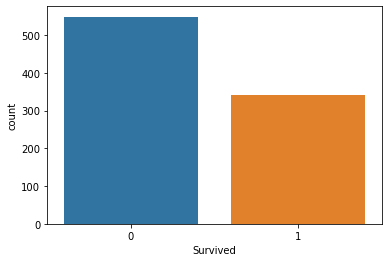

In [7]:
# Bar graph to show number of people survived/not survived
sns.countplot(titanic['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

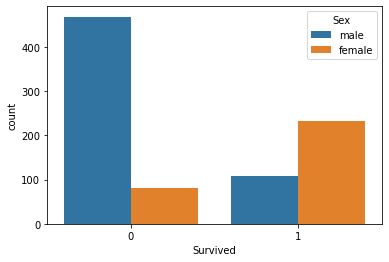

In [8]:
# Bar graph to show survival status based on gender
sns.countplot(x='Survived', hue='Sex', data=titanic)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

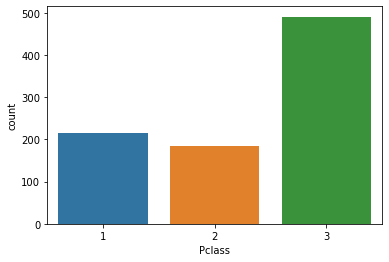

In [9]:
# Bar graph to show distribution of passengers among different classes
sns.countplot(titanic['Pclass'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

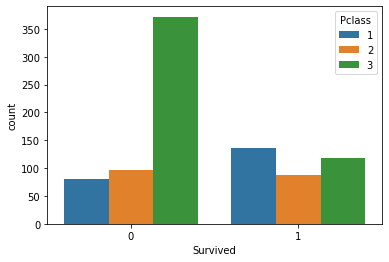

In [10]:
# Bar graph to show survival status based on different classes
sns.countplot(x='Survived', hue='Pclass', data=titanic)

Text(0.5, 1.0, 'Passenger Ages on Titanic')

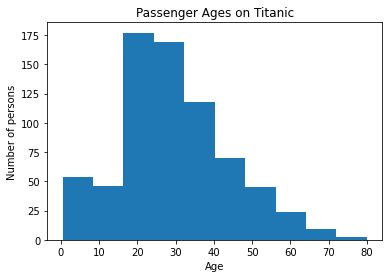

In [11]:
# Histogram of ages of passengers
plt.hist(titanic['Age'])
plt.xlabel("Age")
plt.ylabel("Number of persons")
plt.title('Passenger Ages on Titanic')

Text(0.5, 0, 'Sibling/Spouses Aboard')

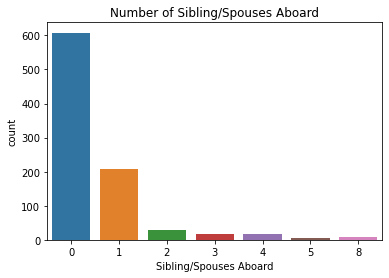

In [12]:
# Bar graph to show number of siblings/spouses passengers have come with
sns.countplot(titanic.SibSp)
plt.title("Number of Sibling/Spouses Aboard")
plt.xlabel("Sibling/Spouses Aboard")

Text(0.5, 0, 'Children/Parents Aboard')

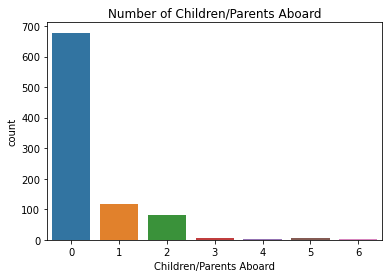

In [13]:
# Bar graph to show number of children/Parents passengers have come with
sns.countplot(titanic.Parch)
plt.title("Number of Children/Parents Aboard")
plt.xlabel("Children/Parents Aboard")

5 - Check for Missing data 


In [14]:
# List of all columns in the dataframe along with their respective number of missing data
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Note : According to titanic.isnull().sum(), there are 177 missing data in Age column, 687 missing data in Cabin column, and 2 missing data in Embarked column.

6 - Data Cleaning : Impute missing values in Age based Pclass

In [15]:
# Step 1 : Check for missing Age values in each of the Pclass (1,2,3)
null_1 = titanic['Age'][titanic['Pclass'] == 1].isnull()
null_2 = titanic['Age'][titanic['Pclass'] == 2].isnull()
null_3 = titanic['Age'][titanic['Pclass'] == 3].isnull()
print("Total number of missing Age value in Pclass1 =", len(null_1[null_1 == True]))
print("Total number of missing Age value in Pclass2 =", len(null_2[null_2 == True]))
print("Total number of missing Age value in Pclass3 =", len(null_3[null_3 == True]))

Total number of missing Age value in Pclass1 = 30
Total number of missing Age value in Pclass2 = 11
Total number of missing Age value in Pclass3 = 136


In [16]:
# Step 2 : Calculate the mean Age in each of the PClass (1,2,3)
pc1 = titanic['Age'][titanic['Pclass'] == 1].mean(skipna = True)
pc2 = titanic['Age'][titanic['Pclass'] == 2].mean(skipna = True)
pc3 = titanic['Age'][titanic['Pclass'] == 3].mean(skipna = True)
print("Mean Age of Pclass1 =", pc1)
print("Mean Age of Pclass2 =", pc2)
print("Mean Age of Pclass3 =", pc3)

Mean Age of Pclass1 = 38.233440860215055
Mean Age of Pclass2 = 29.87763005780347
Mean Age of Pclass3 = 25.14061971830986


In [17]:
# Step 3 : Impute the mean Age values inplace of missing Age values 
titanic['Age'].fillna(titanic.groupby('Pclass')['Age'].transform('mean'), inplace = True)

In [18]:
# Step 4 : Check if all the missing Age data has been filled (Testing)
print("Number of missing data in Age column =", titanic['Age'].isnull().sum())

Number of missing data in Age column = 0


7 - Data Cleaning : Drop the Cabin Column

In [19]:
# Step 1 : titanic.drop() to remove the Cabin column from the dataframe
titanic_new = titanic.drop('Cabin', axis = 1)

8 - Data Cleaning : Drop the row in Embarked column that is NaN

In [20]:
# Step 1 : titanic.dropna to remove NaN values from Embarked column
titanic_new.dropna(subset=['Embarked'], inplace = True)

In [21]:
# Step 2 : Check if the NaN values has been removed from Embarked column
print("Is there any NaN value in Embarked column :", titanic_new['Embarked'].isnull().values.any())

Is there any NaN value in Embarked column : False


In [22]:
titanic_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**EXTRA STEP**  - Data Cleaning : Drop all unwanted columns that are not in use

In [23]:
# Drop PassengerId, Name and Ticket columns as these will not contribute to Survival prediction
titanic_new.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)

In [24]:
# Confirm that all unwanted columns are removed
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


**Feature Engineering (Additional Step)** 

In [25]:
#Get ticket information
titanic['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

The information we get from Ticket is :
*   There are 891 Ticket values (rows)
*   Out of this 681 values are unique (no repetition)
*   The most used Ticket value is 347082
*  This value is repeated 7 times in the dataframe








**NOTE : Uncomment when running SECOND time** (last 2 lines)

In [26]:
# Grab the 'title' from the Name as a feature and Display the count of each 'title'
##titanic_new['Title'] = titanic['Name'].apply(lambda x: x[x.find(', ')+2 : x.find('.')])
##titanic_new['Title'].value_counts()

**NOTE : Uncomment when running SECOND time** (last 3 lines)

In [27]:
# Grab the Cabin letter as feature and Display the count of each letter
##titanic.dropna(subset=['Cabin'], inplace = True)
##titanic_new['Cabin_Letter'] = titanic['Cabin'].astype(str).str[0]
##titanic_new['Cabin_Letter'].value_counts()

**NOTE : Uncomment when running SECOND time** (last line)

In [28]:
# Information from Cabin_Letter
##titanic_new['Cabin_Letter'].describe()

9 - Convert categorical features (Sex, Embark) to dummy variables using get_dummies **(without feature engineering)**

In [29]:
titanic_new = pd.get_dummies(titanic_new,columns = ['Sex','Embarked'])

Note : Sex is split into 'male' and 'female' dummy variables; Embarked is split into 'C', 'Q' and 'S' dummy variables

9 - Convert categorical features (Sex, Embark) to dummy variables using get_dummies **(with feature engineering)**

In [30]:
#titanic_new = pd.get_dummies(titanic_new,columns = ['Sex','Embarked','Title','Cabin_Letter'])

In [31]:
# Check if the dummy variables are created
titanic_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


10 - Build a logistic regression model 

Step 1 : Splitting the Data

In [32]:
# Import required libraries to split the data
from sklearn.model_selection import train_test_split

In [33]:
# Define the X (indepenent) and y (dependent) variables
X = titanic_new.drop('Survived', axis = 1)
y = titanic_new['Survived']

In [34]:
# Split the data into training and testing data on 70:30 ratio respectively 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 24)

Note : X_train and y_train are used for creating the logistic model, while X_test and y_test are used for testing the model

In [35]:
# View X_train data
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
802,1,11.0,1,2,120.0000,0,1,0,0,1
855,3,18.0,0,1,9.3500,1,0,0,0,1
500,3,17.0,0,0,8.6625,0,1,0,0,1
798,3,30.0,0,0,7.2292,0,1,1,0,0
178,2,30.0,0,0,13.0000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
146,3,27.0,0,0,7.7958,0,1,0,0,1
402,3,21.0,1,0,9.8250,1,0,0,0,1
344,2,36.0,0,0,13.0000,0,1,0,0,1
193,2,3.0,1,1,26.0000,0,1,0,0,1


In [36]:
# View y_train data
y_train

802    1
855    1
500    0
798    0
178    0
      ..
146    1
402    0
344    0
193    1
419    0
Name: Survived, Length: 622, dtype: int64

Step 2 : Building the Model

In [37]:
# Import required libraries to build the logistic regression model
from sklearn.linear_model import LogisticRegression

In [38]:
# Create logistic regression model using training data (X_train, y_train)
model = LogisticRegression(solver = 'lbfgs', max_iter=900)
model.fit(X_train, y_train)

LogisticRegression(max_iter=900)

In [39]:
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Sex_female  889 non-null    uint8  
 7   Sex_male    889 non-null    uint8  
 8   Embarked_C  889 non-null    uint8  
 9   Embarked_Q  889 non-null    uint8  
 10  Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 53.0 KB


In [40]:
# View X_test data
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
170,1,61.000000,0,0,33.5000,0,1,0,0,1
557,1,38.233441,0,0,227.5250,0,1,1,0,0
207,3,26.000000,0,0,18.7875,0,1,1,0,0
72,2,21.000000,0,0,73.5000,0,1,0,0,1
830,3,15.000000,1,0,14.4542,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
80,3,22.000000,0,0,9.0000,0,1,0,0,1
89,3,24.000000,0,0,8.0500,0,1,0,0,1
495,3,25.140620,0,0,14.4583,0,1,1,0,0
317,2,54.000000,0,0,14.0000,0,1,0,0,1



Note : Training data = 70% and Testing data = 30%

*   Training data = 622 
*   Testing data = 267
*   Total data = 889 ( 2 rows were removed due to NaN value in Embarked column )




11 - Predict and Evaluate the model

In [41]:
# Predict the model
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [42]:
# Count of Survived / Not Survived
print('Number of people who are predicted to survive (testing data) =', np.count_nonzero(y_pred == 1))
print('Number of people who are predicted to not survive (testing data) =', np.count_nonzero(y_pred == 0))

Number of people who are predicted to survive (testing data) = 81
Number of people who are predicted to not survive (testing data) = 186


In [43]:
# Probabilities that the predicted output is equal to 0 (deceased) or 1 (survival)
model.predict_proba(X_test)

array([[0.76114864, 0.23885136],
       [0.33496972, 0.66503028],
       [0.86544682, 0.13455318],
       [0.66317699, 0.33682301],
       [0.3189919 , 0.6810081 ],
       [0.52491844, 0.47508156],
       [0.90189273, 0.09810727],
       [0.73787087, 0.26212913],
       [0.84019511, 0.15980489],
       [0.87435886, 0.12564114],
       [0.77850159, 0.22149841],
       [0.44703216, 0.55296784],
       [0.05731756, 0.94268244],
       [0.12696538, 0.87303462],
       [0.83073428, 0.16926572],
       [0.9291483 , 0.0708517 ],
       [0.9597262 , 0.0402738 ],
       [0.5947867 , 0.4052133 ],
       [0.88182386, 0.11817614],
       [0.89612047, 0.10387953],
       [0.75064221, 0.24935779],
       [0.08398589, 0.91601411],
       [0.96572088, 0.03427912],
       [0.87442611, 0.12557389],
       [0.05554186, 0.94445814],
       [0.20729079, 0.79270921],
       [0.79878631, 0.20121369],
       [0.74850716, 0.25149284],
       [0.24822042, 0.75177958],
       [0.85417019, 0.14582981],
       [0.

In [44]:
# Accuracy of predicted model
print("The accuracy of the model =", model.score(X_test,y_test) *100)

The accuracy of the model = 83.89513108614233


In [45]:
# Value of b in y = m*x + b (y-intercept)
model.intercept_

array([3.44499851])

In [46]:
# Value of m in y = m*x + b (coefficient of the features)
model.coef_

array([[-1.0724346 , -0.03487751, -0.25134219, -0.12175808,  0.00397093,
         1.25079926, -1.25379245, -0.00297722,  0.28324071, -0.28325667]])

12 - Analyse Confusion Matrix and Classification Report

Note : Key points
       
1.   Positive = Survived (1)
2.   Negative = Not Survived (0)

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [48]:
print(confusion_matrix(y_test, y_pred))

[[156  13]
 [ 30  68]]


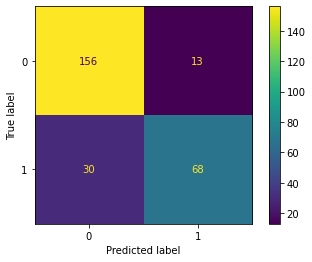

In [49]:
conf_m = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
conf_m.plot()

In [50]:
TN, FN, FP, TP = confusion_matrix(y_test ,y_pred).ravel()
print('True Negative :', TN)
print('False Negative :', FN)
print('False Positive :', FP)
print('True Positive :', TP)

True Negative : 156
False Negative : 13
False Positive : 30
True Positive : 68


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       169
           1       0.84      0.69      0.76        98

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.84       267



******************************************************************** THE END ************************************************************************